In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
train= pd.read_csv('train.csv')
X_train = train.drop('Survived', axis=1)
y_train = train['Survived']

In [46]:
test= pd.read_csv('test.csv')

In [47]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [73]:
#Data Analysis
#Distinguish categorical vars and discrete vars

In [85]:
vars = X_train.columns
X_train[vars].dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [78]:
X_train.nunique()

PassengerId    891
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [86]:
X_train.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [49]:
cat_vars = [var for var in X_train.columns if train[var].dtype=='O']
cat_vars

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [62]:
 

X_train[num_vars].dtypes

PassengerId      int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
dtype: object

In [64]:
X_train['SibSp'].nunique()

7

In [67]:
discrete_num_vars = [var for var in X_train[num_vars] if X_train[var].nunique()<10]
#X_train[discrete_num_vars]

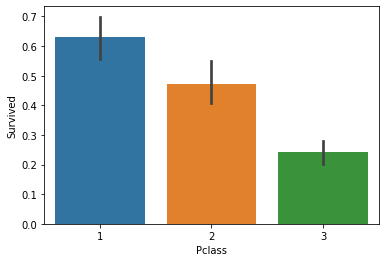

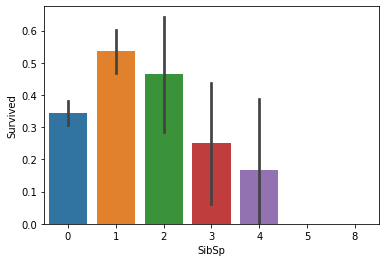

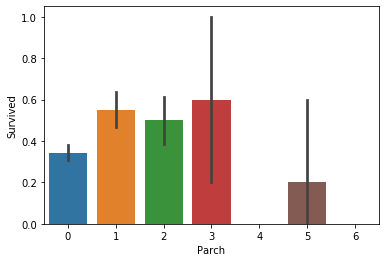

In [68]:
for var in train[discrete_num_vars]:
    sns.barplot(train[var], y_train)
    plt.show()

In [91]:
continuous_num_vars = [var for var in X_train[num_vars] if X_train[var].nunique()>10]
#X_train[cat_num_vars]

In [88]:
discrete_vars_with_na = [var for var in X_train[discrete_num_vars] if X_train[var].isnull().sum()>0]

In [92]:
continuous_vars_with_na = [var for var in X_train[continuous_num_vars] if X_train[var].isnull().sum()>0]

In [94]:
cat_vars_with_na = [var for var in X_train[cat_vars] if X_train[var].isnull().sum()>0]

In [97]:
discrete_vars_with_na

[]

In [99]:
continuous_vars_with_na

['Age']

In [109]:
#Amongst passengers which have missing age
train[X_train['Age'].isnull()]['Survived'].mean()

0.2937853107344633

In [110]:
#Amongst passengers which have age
train[X_train['Age'].notnull()]['Survived'].mean()

0.4061624649859944

In [111]:
cat_vars_with_na

['Cabin', 'Embarked']

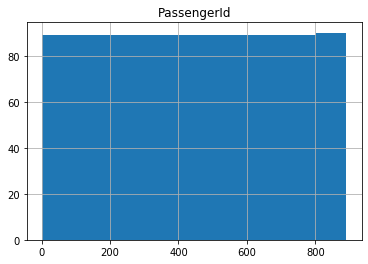

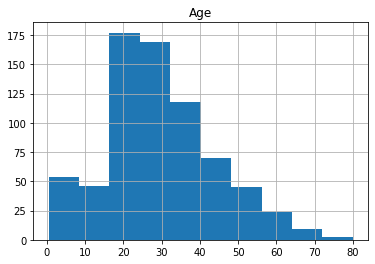

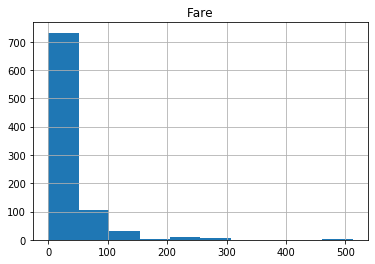

In [118]:
#Distribution of sample
def analyse_continuous(df, var):
    df = df.copy()
    df[var].hist()
    plt.title(var)
    plt.show()

for var in continuous_num_vars:
    analyse_continuous(X_train, var)

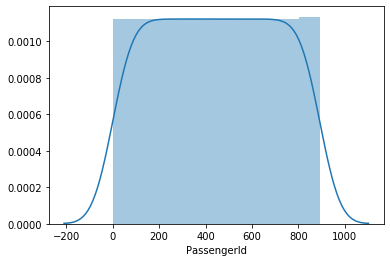

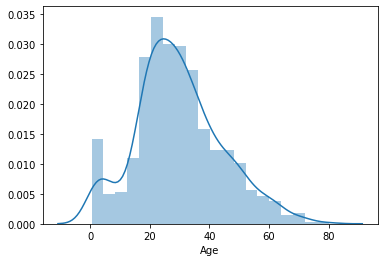

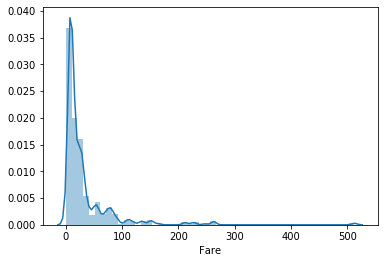

In [142]:
for var in train[continuous_num_vars]:
    sns.distplot(X_train[X_train[var].notnull()][var])
    plt.show()

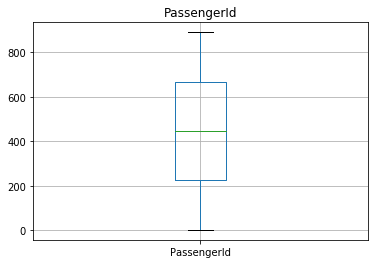

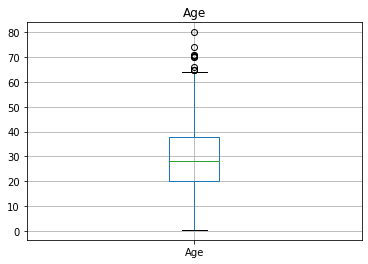

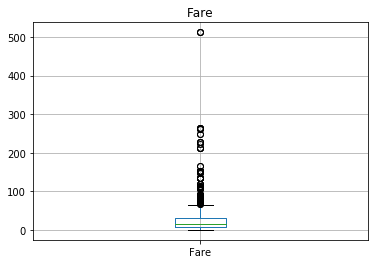

In [149]:
#find outliers
for var in continuous_num_vars:
    train.boxplot(column=var)
    plt.title(var)
    plt.show()

In [ ]:
#find out categories in cat_vars - cardinality

In [148]:
X_train[cat_vars].nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

In [152]:
def analyse_rare_labels(df,var,rare_perc):
    df = df.copy()
    tmp = df.groupby(var)['Survived'].count()/len('Survived')    
    return tmp[tmp>rare_perc]

for var in cat_vars:
    print(analyse_rare_labels(train, var, 0.05))
    print()

Name
Abbing, Mr. Anthony                                0.125
Abbott, Mr. Rossmore Edward                        0.125
Abbott, Mrs. Stanton (Rosa Hunt)                   0.125
Abelson, Mr. Samuel                                0.125
Abelson, Mrs. Samuel (Hannah Wizosky)              0.125
Adahl, Mr. Mauritz Nils Martin                     0.125
Adams, Mr. John                                    0.125
Ahlin, Mrs. Johan (Johanna Persdotter Larsson)     0.125
Aks, Mrs. Sam (Leah Rosen)                         0.125
Albimona, Mr. Nassef Cassem                        0.125
Alexander, Mr. William                             0.125
Alhomaki, Mr. Ilmari Rudolf                        0.125
Ali, Mr. Ahmed                                     0.125
Ali, Mr. William                                   0.125
Allen, Miss. Elisabeth Walton                      0.125
Allen, Mr. William Henry                           0.125
Allison, Master. Hudson Trevor                     0.125
Allison, Miss. Helen Lorai

NameError: name 'X_train_new' is not defined